# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

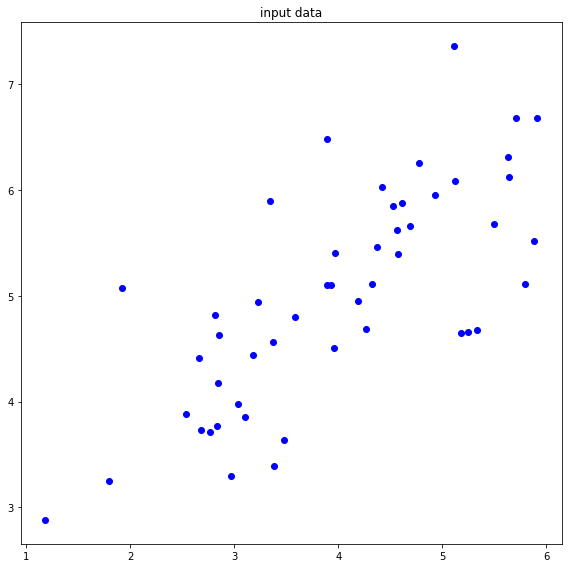

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [15]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # mean을 구해서 빼고 standard deviation으로 나누어주는

    feature_normalize = (feature-feature.mean(axis=0))/np.std(feature,axis=0)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize
    #feature_noramlize.shape = (50,2)

In [16]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [24]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Sigma = (np.matmul(np.transpose(feature),feature) ) / feature.shape[0]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [108]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # covarince matrix 의 eigenvalue, eigenvector 를 구해야하는 것이다.
    # lambda : eigenvalue, u : eigenvector
    # 둘을 곱한 것이 p
    # eigenvalue 가 가장 큰 것이 principal_component1, 두번째로 큰 것이 2

    feature = compute_covariance(normalize(feature))
    eigenValue , eigenVector =np.linalg.eig(feature) 
    index_sorted_eigenValue = eigenValue.argsort() #index 값 반환
    
    first_value = eigenValue[index_sorted_eigenValue[-1]]
    first_vector = eigenVector[:,index_sorted_eigenValue[-1]]

    second_value = eigenValue[index_sorted_eigenValue[-2]]
    second_vector = eigenVector[:,index_sorted_eigenValue[-2]]

    principal_component_1 = first_vector*first_value
    principal_component_2 = second_vector*second_value
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

In [109]:
compute_principal_component(feature0)

(array([1.22720503, 1.22720503]), array([-0.18700853,  0.18700853]))

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [150]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # line 위에 projection한 점들 (x,y)
    vector_norm = np.sqrt(sum(vector**2))
    normal_vector = vector/vector_norm

    proj_onto_normal_vector = np.dot(feature,vector)/vector_norm
    proj_onto_line = (proj_onto_normal_vector[:, None]*normal_vector)
    projection = proj_onto_line
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

In [151]:

principal_component_1 , principal_component_2= compute_principal_component(feature0)

compute_projection_onto_line(feature0, principal_component_1)

array([[3.385335, 3.385335],
       [5.19103 , 5.19103 ],
       [3.533835, 3.533835],
       [3.24032 , 3.24032 ],
       [3.511035, 3.511035],
       [5.189525, 5.189525],
       [3.55433 , 3.55433 ],
       [6.296035, 6.296035],
       [4.51367 , 4.51367 ],
       [5.09257 , 5.09257 ],
       [4.98586 , 4.98586 ],
       [4.91645 , 4.91645 ],
       [4.57319 , 4.57319 ],
       [4.95279 , 4.95279 ],
       [3.30193 , 3.30193 ],
       [5.97369 , 5.97369 ],
       [5.175785, 5.175785],
       [3.738485, 3.738485],
       [6.23668 , 6.23668 ],
       [4.914535, 4.914535],
       [6.194185, 6.194185],
       [4.19123 , 4.19123 ],
       [5.87991 , 5.87991 ],
       [4.47645 , 4.47645 ],
       [3.210505, 3.210505],
       [4.083195, 4.083195],
       [5.442255, 5.442255],
       [5.450675, 5.450675],
       [3.817905, 3.817905],
       [4.494595, 4.494595],
       [4.61812 , 4.61812 ],
       [5.700575, 5.700575],
       [3.48051 , 3.48051 ],
       [5.006125, 5.006125],
       [3.9704

## compute the principal components and the projection of feature

In [113]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [114]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [128]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')

    plt.arrow(0,0,principal_component_1[0],principal_component_1[1], width = 0.05, color='red')
    plt.arrow(0,0,principal_component_2[0],principal_component_2[1], width = 0.05, color='green')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [129]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')

    plt.axline((0,0),principal_component_1,color="red")



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [130]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')

    plt.axline((0,0),principal_component_2,color="red")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [176]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')

    plt.scatter(projection1[:,0],projection1[:,1], color="green", s=30, zorder=2)
    plt.axline((0,0),principal_component_1,color="red",zorder=1)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [177]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')

    plt.scatter(projection2[:,0],projection2[:,1], color="green", s=30, zorder=2)
    plt.axline((0,0),principal_component_2,color="red",zorder=1)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [178]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')

    plt.scatter(projection1[:,0],projection1[:,1], color="green", s=30, zorder=2)
    plt.axline((0,0),principal_component_1,color="red",zorder=1)
    for i, j in zip(feature, projection1):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [179]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')

    plt.scatter(projection2[:,0],projection2[:,1], color="green", s=30, zorder=2)
    plt.axline((0,0),principal_component_2,color="red",zorder=1)
    for i, j in zip(feature, projection2):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')




    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


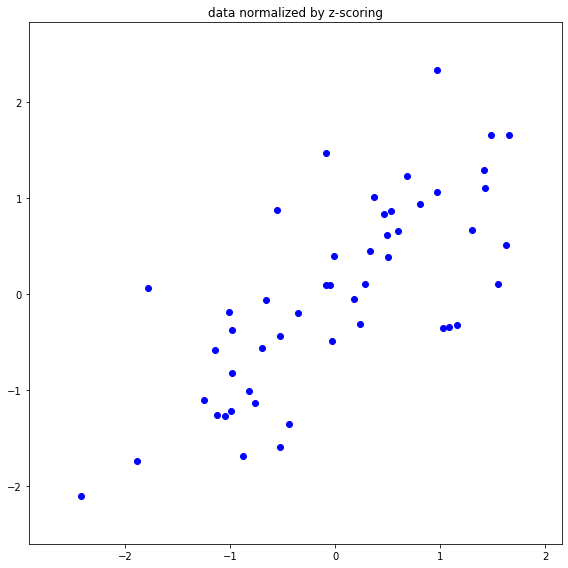

**************************************************
## [RESULT 02]
**************************************************


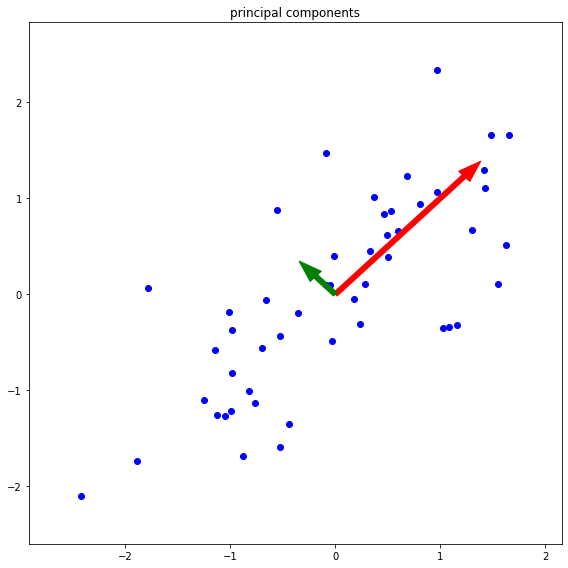

**************************************************
## [RESULT 03]
**************************************************


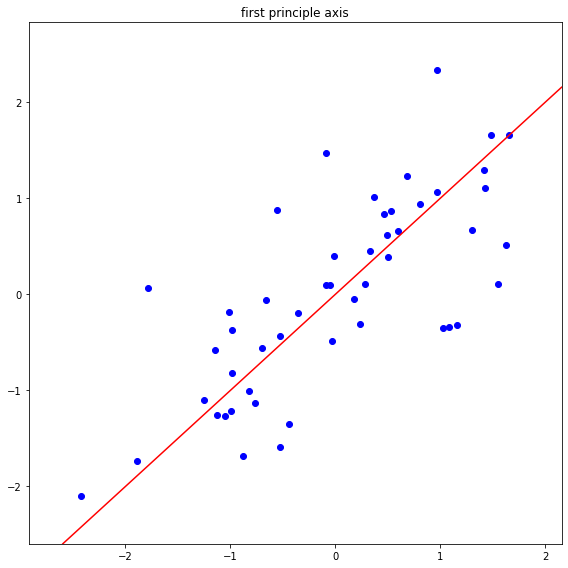

**************************************************
## [RESULT 04]
**************************************************


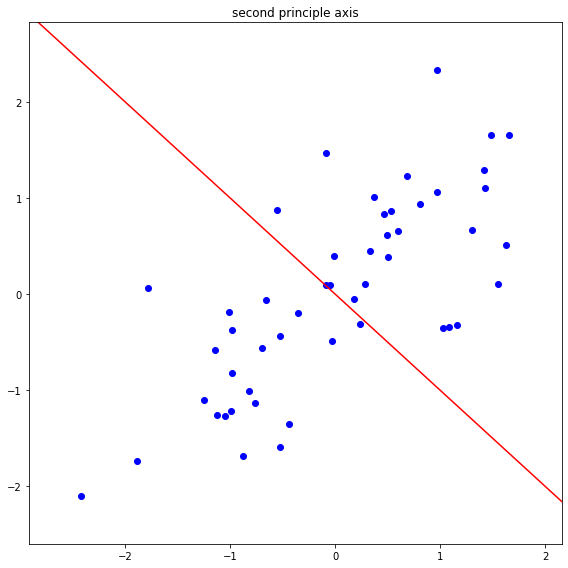

**************************************************
## [RESULT 05]
**************************************************


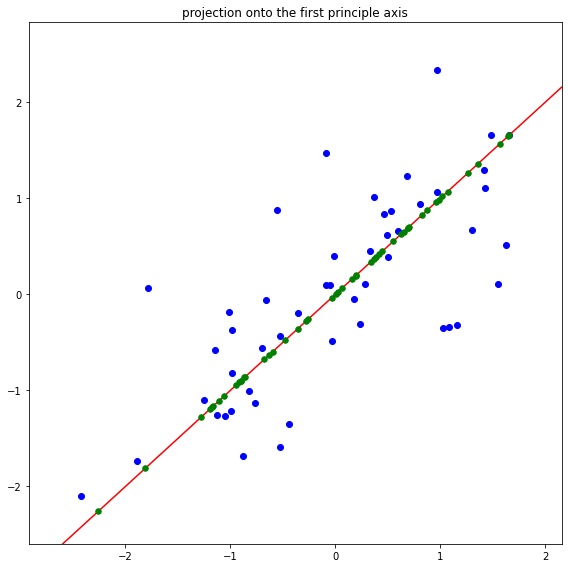

**************************************************
## [RESULT 06]
**************************************************


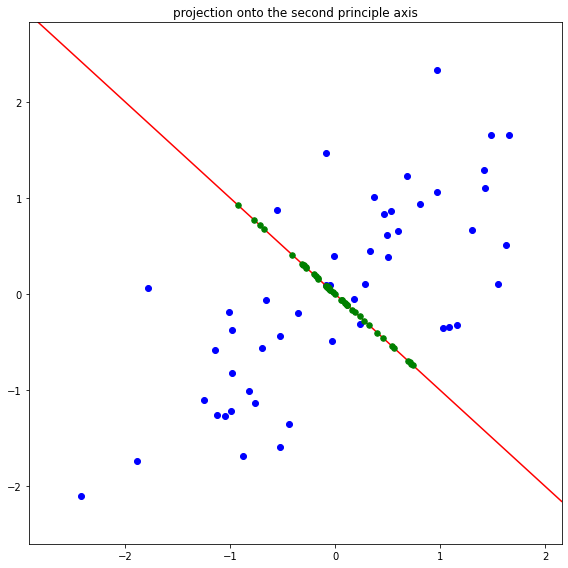

**************************************************
## [RESULT 07]
**************************************************


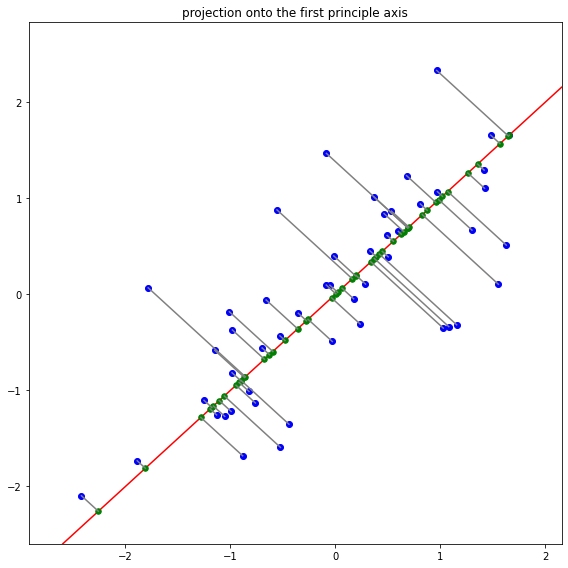

**************************************************
## [RESULT 08]
**************************************************


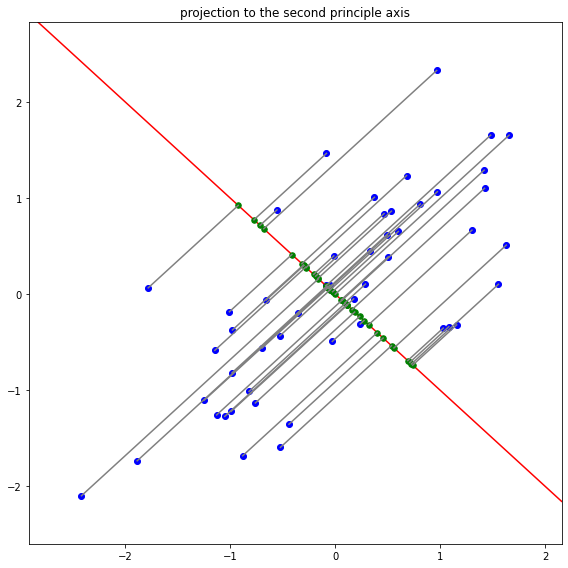

In [180]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)